In [2]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from formulaic import Formula

In [ ]:
# Si necesitan instalar algún paquete
#!pip install gapminder
#!pip install formulaic

In [ ]:
# Si necesitan cambiar de directorio de trabajo
#import os
#print(pwd)
#os.chdir('./notebooks')

# Caso de estudio: calorías de alimentos

In [2]:
df_nutricion = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/nutrition.csv')
df_nutricion

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Aníbal\AppData\Local\Temp\ipykernel_13912\1638699725.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_nutricion = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/nutrition.csv')


,FDC_ID,Item,Category,Calorias_kcal,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,NaN,NaN,3.20,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,NaN,NaN,42.60,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0,26.83,0.00,1.80,61.0,0.0,68.81,NaN,0.0
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0,22.95,0.00,1.45,55.0,0.0,74.38,NaN,0.0
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0,30.19,0.00,1.90,73.0,0.0,66.28,NaN,0.0
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0,20.60,0.00,2.31,57.0,0.0,75.84,NaN,0.0


En este ejemplo consideramos que los datos faltantes representan que el alimento no contiene ese ingrediente y lo convertimos a 0.

In [3]:
# Utilizamos fillna para convertir NaN a 0.
df_nutricion = df_nutricion.fillna(0)

In [4]:
df_nutricion.head()

,FDC_ID,Item,Category,Calorias_kcal,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


Construimos las matrices X e y utilizando Formulaic

In [5]:
# No usamos intercept en este modelo
y, X = (
    Formula('Calorias_kcal ~ Proteinas_g + Carbohidratos_g + GrasaTotal_g + Colesterol_mg + Fibra_g + Agua_g + Alcohol_g + VitaminaC_mg - 1')
    .get_model_matrix(df_nutricion)
)

In [6]:
X.head() # Vemos que nos agregó una columna de Intercept

,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [7]:
y.head()

,Calorias_kcal
0,307.0
1,330.0
2,377.0
3,232.0
4,273.0


Antes de separar en entrenamiento y testeo, veamos los errores del modelo lineal con todos los datos 

In [8]:
modelo = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal. 

modelo.fit(X, y)   # Realizamos el ajuste

LinearRegression(fit_intercept=False)

In [9]:
modelo.coef_

array([[ 4.13762244e+00,  3.97641700e+00,  8.84901423e+00,
         5.63736883e-03, -1.68542090e+00,  1.28377434e-02,
         6.85776696e+00, -2.55226271e-02]])

Analizando los coeficientes vemos que las variables Proteinas_g, Carbohidratos_g y GrasaTotal_g son las que tienen mayor peso en el modelo.

Analizamos la "bondad" del ajuste.

In [10]:
y_pred = modelo.predict(X)
# Calculando el R^2
r2 = r2_score(y, y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9957808144789252
Raiz cuadarada del ECM:  10.960628490483586


A priori es un buen modelo, tenemos 7792 observaciones y obtenemos R^2 casi igual a 1 con solo 9 variables.

# Conjuntos de entrenamiento y testeo
Ajustamos el modelo separando en 80-20

In [11]:
from sklearn.model_selection import train_test_split
X

,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0
...,...,...,...,...,...,...,...,...
7788,26.83,0.00,1.80,61.0,0.0,68.81,0.0,0.0
7789,22.95,0.00,1.45,55.0,0.0,74.38,0.0,0.0
7790,30.19,0.00,1.90,73.0,0.0,66.28,0.0,0.0
7791,20.60,0.00,2.31,57.0,0.0,75.84,0.0,0.0


In [12]:
# Construimos primero las matrices X e y utilizando Formulaic (o cualquier otro método)
y, X = (
    Formula('Calorias_kcal ~ Proteinas_g + Carbohidratos_g + GrasaTotal_g + Colesterol_mg + Fibra_g + Agua_g + Alcohol_g + VitaminaC_mg - 1')
    .get_model_matrix(df_nutricion)
)

# Separamos en entrenamiento (train) y testeo (test).
# El parámetro test_size=0.2 indica que tomamos un 20% de los datos para testeo.
# El parámetro random_state=42 es lo que se denomina semilla aleatoria. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [13]:
X_train

,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
6389,21.69,0.00,4.00,61.0,0.0,73.25,0.0,0.0
1431,1.90,3.80,0.60,0.0,0.7,92.50,0.0,23.0
2715,1.90,0.00,80.20,0.0,0.0,15.80,0.0,0.4
4497,7.40,2.00,1.90,0.0,0.1,88.10,0.0,0.0
6746,6.21,21.39,12.48,14.0,3.7,58.15,0.0,0.0
...,...,...,...,...,...,...,...,...
3046,9.07,8.09,0.22,0.0,0.3,82.03,0.0,0.0
1725,0.89,8.45,0.06,0.0,1.7,90.22,0.0,8.0
4079,24.10,0.00,18.60,146.0,0.0,56.90,0.0,1.7
2254,0.83,12.83,0.83,0.0,1.2,84.88,0.0,42.1


In [14]:
X_test

,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
3810,20.52,0.00,3.97,79.0,0.0,75.67,0.0,0.0
840,3.20,27.60,8.40,29.0,0.9,60.00,0.0,7.7
7714,24.26,0.04,12.76,78.0,0.0,63.15,0.0,0.0
1350,2.68,11.17,8.20,68.0,1.3,76.00,0.0,10.0
3984,20.94,0.49,8.43,41.0,0.0,66.52,0.0,0.0
...,...,...,...,...,...,...,...,...
6607,21.45,0.00,3.61,66.0,0.0,74.26,0.0,0.0
1154,2.48,10.81,0.62,0.0,4.9,85.10,0.0,9.5
1581,1.96,16.94,4.20,1.0,1.5,75.25,0.0,10.5
3599,22.24,3.36,14.87,136.0,0.5,57.25,0.0,0.0


### Números pseudo-aleatorios y semillas aleatorias.

Las computadoras no pueden generar números al azar, tienen algoritmos que generan números que parecen al azar denominados pseudo aleatorios. 

Los números se generan a partir de una semilla. Si corremos el codigo utilizando la misma semilla,  vamos a obtener siempre el mismo resultado.

Esto permite que el experimento sea reproducible.

### Entrenamiento

In [15]:
# Entrenamos el modelo utilizando los conjuntos de entrenamiento

modelo = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal
modelo.fit(X_train,y_train)   # Realizamos el ajuste

LinearRegression(fit_intercept=False)

### Testeo

In [16]:
# Medimos la bondad del ajuste en el conjunto de testeo

y_pred = modelo.predict(X_test)

# Calculando el R^2
r2 = r2_score(y_test,y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(y_test,y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9966808957998354
Raiz cuadarada del ECM:  10.3153360912748


Vemos que el modelo ajusto bien en los datos de testeo, podemos confiar en el modelo obtenido.

**Ejercicio:** Utilizar distintas semillas aleatorias. ¿Se obtienen los mismos valores? ¿Se mantienen las conclusiones?

## Selección de modelos

Comparamos con un modelo utilizando solo las tres primeras variables (las de mayor peso en el modelo) y sin intercept.

In [17]:
y, X = (
    Formula('Calorias_kcal ~ Proteinas_g + Carbohidratos_g + GrasaTotal_g - 1')
    .get_model_matrix(df_nutricion)
)
X.head()

,Proteinas_g,Carbohidratos_g,GrasaTotal_g
0,5.88,41.18,13.24
1,4.34,53.42,11.27
2,6.10,79.80,3.70
3,8.00,46.00,1.80
4,6.58,41.05,9.22


In [18]:
# Separamos en entrenamiento (train) y testeo (test).
# El parámetro test_size=0.2 indica que tomamos un 20% de los datos para testeo.
# El parámetro random_state=42 es lo que se denomina semilla aleatoria. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
modelo = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X_train, y_train)   # Realiza
print("Coeficientes:", modelo.coef_)

y_pred = modelo.predict(X_test)
# Calculando el R^2
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

Coeficientes: [[4.1353808  3.85362735 8.84446623]]
R^2:  0.9906661296314964
Raiz cuadarada del ECM:  16.732693949223897


Vemos que el modelo es un poco peor pero mucho más simple. 

**Conclusión rápida:** El modelo con 3 variables es útil para una cuenta rápida, pero si necesitamos una mayor precisión podemos utilizar el modelo completo.

**Ejercicio.** Buscar en recursos en-líne]a la fórmula usualmente utilizada para el cálculo de calorías y comparar con la fórmula que obtuvimos.

# Caso de estudio: rendimiento del suelo

In [22]:
df_rendimiento = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/rendimiento.csv')
df_rendimiento

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Aníbal\AppData\Local\Temp\ipykernel_13912\2986913358.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_rendimiento = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/rendimiento.csv')


,Ano,Localidad,x1,x2,x3,x4,x5,x6,x7,x8,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,2007,San Antonio de Areco,6.2,3.1,6.0,26,4.3,MAP,100,S,...,Baguette 11,5-Jun,260,Z 3.7,4.0,35.0,4.0,24-Oct,621,5666
1,2007,San Antonio de Areco,6.2,3.1,6.0,26,4.3,MAP,100,S,...,Baguette 11,5-Jun,260,Z 3.7,4.0,35.0,4.0,24-Oct,673,5874
2,2007,San Antonio de Areco,6.2,3.1,6.0,26,4.3,MAP,100,S,...,Baguette 11,5-Jun,249,Z 3.7,4.0,35.0,4.0,24-Oct,671,5862
3,2007,San Antonio de Areco,6.2,3.1,6.0,26,4.3,MAP,100,S,...,Baguette 11,5-Jun,252,Z 3.7,4.0,35.0,4.0,24-Oct,721,6055
4,2007,San Antonio de Areco,6.2,3.1,6.0,26,4.3,MAP,140,S,...,Baguette 11,5-Jun,272,Z 3.7,4.0,35.0,4.0,24-Oct,656,5660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2010,Las Flores,6.0,2.8,5.9,53,3.8,MAP,70,S,...,Guerrero,10-Jun,188,Z3.9,0.0,47.0,0.0,2-Nov,456,4705
152,2010,Las Flores,6.0,2.8,5.9,53,3.8,MAP,100,S,...,Baguette 11,10-Jun,205,Z3.9,0.0,47.0,34.0,2-Nov,560,5821
153,2010,Las Flores,6.0,2.8,5.9,53,3.8,MAP,70,S,...,Guerrero,10-Jun,211,Z3.9,0.0,59.0,12.0,2-Nov,453,5104
154,2010,Las Flores,6.0,2.8,5.9,53,3.8,MAP,130,S,...,Baguette 17,10-Jun,238,Z3.9,0.0,55.0,44.0,28-Oct,518,4705


**Ejercicio.**

Proponer un modelo para predecir el rendimiento de una hectárea cultivada en función de algunas características del lugar y los fertilizantes utilizados.

In [23]:
df_rendimiento.columns

Index(['Ano', 'Localidad', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'y'],
      dtype='object')

In [24]:
# Acá están todas las variables
"Rendimiento ~ pH + MO + P + N + S + P_Ferti + P_kgha + S_Fuente + S_kgha + Ndisp + Palc + Variedad + FdS + plantas + momento + IncSep + IncMam + IncRoya + FdD + Espigas"

'Rendimiento ~ pH + MO + P + N + S + P_Ferti + P_kgha + S_Fuente + S_kgha + Ndisp + Palc + Variedad + FdS + plantas + momento + IncSep + IncMam + IncRoya + FdD + Espigas'

In [20]:
# Obtenemos la matriz de datos X y los valores a predecir y
y, X = (
    Formula("Rendimiento ~ pH + MO + P + N + S + P_Ferti + P_kgha + S_Fuente + S_kgha + Ndisp + Palc + Variedad + FdS + plantas + momento + IncSep + IncMam + IncRoya + FdD + Espigas")
    .get_model_matrix(df_rendimiento)
)

# Inicializamos el modelo lineal
modeloLineal = linear_model.LinearRegression() 

# Entrenamiento
modeloLineal.fit(X, y)

# Predicciones
y_pred = modeloLineal.predict(X)

# Evaluación
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, y_pred)
print(f"R cuadrado: {r2:.5f}")

NameError: name 'df_rendimiento' is not defined

# Cuatro niveles de selección de modelos
Queremos estimar los costos de salud que tendrá un cliente de una prepaga en función de algunas variables de la persona.

In [25]:
df_salud = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/insurance.csv')
df_salud

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Aníbal\AppData\Local\Temp\ipykernel_13912\1712410277.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_salud = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/insurance.csv')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


La variable respuesta es `charges` y el resto son variables explicativas.

**Pregunta:** ¿Cuáles son variables numércias? ¿Cuáles son categóricas? Las variables categóricas son: ¿binarias, nominales, ordinales?

In [26]:
df_salud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Pregunta:** ¿Cuántas categorías tiene la variable `region`?

In [27]:
# Otro comando útil para analizar las variables numéricas
df_salud.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Por ejemplo, en la variable `charges` vemos que el promedio es 13270, y el máximo es 63770. Esto podría indica la presencia de outliers, que dificultan el modelo. ¿Cómo podemos visualizar los outliers?

<Axes: ylabel='charges'>

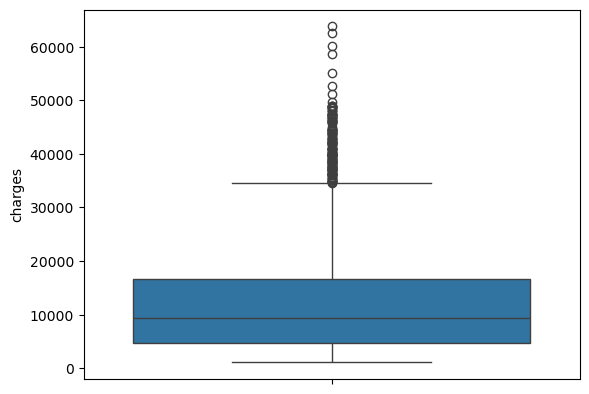

In [28]:
sns.boxplot(df_salud["charges"])

En este ejemplo dejamos los outliers. Ejercicio: ¿cambian las conclusiones si eliminamos los outliers?

## Nivel 1: entrenamos y testeamos el modelo usando todos los datos

In [29]:
y, X = (
    Formula('charges ~ age + sex + bmi + children + smoker + region')
    .get_model_matrix(df_salud)
)
X.head()

,Intercept,age,sex[T.male],bmi,children,smoker[T.yes],region[T.northwest],region[T.southeast],region[T.southwest]
0,1.0,19,0,27.900,0,1,0,0,1
1,1.0,18,1,33.770,1,0,0,1,0
2,1.0,28,1,33.000,3,0,0,1,0
3,1.0,33,1,22.705,0,0,1,0,0
4,1.0,32,1,28.880,0,0,1,0,0


In [30]:
# Podemos ver la correlación entre las distintas variables (corresponde al R de un modelo lineal y=ax+b)
pd.concat([X,y], axis = 1).corr()

,Intercept,age,sex[T.male],bmi,children,smoker[T.yes],region[T.northwest],region[T.southeast],region[T.southwest],charges
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.000407,-0.011642,0.010016,0.299008
sex[T.male],NaN,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.011156,0.017117,-0.004184,0.057292
bmi,NaN,0.109272,0.046371,1.000000,0.012759,0.003750,-0.135996,0.270025,-0.006205,0.198341
children,NaN,0.042469,0.017163,0.012759,1.000000,0.007673,0.024806,-0.023066,0.021914,0.067998
smoker[T.yes],NaN,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.036945,0.068498,-0.036945,0.787251
region[T.northwest],NaN,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,1.000000,-0.346265,-0.320829,-0.039905
region[T.southeast],NaN,-0.011642,0.017117,0.270025,-0.023066,0.068498,-0.346265,1.000000,-0.346265,0.073982
region[T.southwest],NaN,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.320829,-0.346265,1.000000,-0.043210
charges,NaN,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039905,0.073982,-0.043210,1.000000


In [31]:
# Ajustamos el modelo
modelo = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X, y)   # Realiza
print("Coeficientes:", modelo.coef_)

Coeficientes: [[-11938.53857617    256.85635254   -131.3143594     339.19345361
     475.50054515  23848.53454191   -352.96389942  -1035.02204939
    -960.0509913 ]]


In [32]:
# Predicciones
y_pred = modelo.predict(X)

# Bondad del ajuste
r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.7509130345985207
Raiz cuadarada del ECM:  6041.6796511744515


## Nivel 2: separamos en entrenamiento y testeo

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Ajustamos el modelo
modelo = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X_train, y_train)   # Realiza

# Predicciones
y_pred = modelo.predict(X_test)

# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.6929615348570297
Raiz cuadarada del ECM:  6292.412206129477


**Pregunta:** Con la semilla aleatoria 42 bajó el ECM. Si cambiamos la semilla por ejemplo a 4?

## Nivel 3: separamos en entrenamiento, validación y testeo
#### Paso 1: separamos en entrenamiento y testeo el dataframe original

In [42]:
df_train, df_test = train_test_split(df_salud, test_size=0.2, random_state=42)
df_train.shape

(1070, 7)

Podemos también primero transformar las variables y después separar en entrenamiento y testeo, pero tenemos que tener cuidado y evitar usar en el entrenamiento datos del conjunto de testeo.

Por ejemplo, si queremos normalizar una variable mediante StandardScaler, tenemos que calcular los parámetros de la normalización en los datos de entrenamiento y aplicar esa misma transformación en los datos de testeo.

#### Paso 2A: definimos un primer modelo y separamos el dataset df_train en entrenamiento y validación para entrenar el modelo.

In [ ]:
# Todo esto es con entrenamiento y validación en el df_train 

formula1 = 'charges ~ age + sex + bmi + children + smoker + region' # planteamos la columna a predecir y las columnas predictoras.
y1, X1 = (
    Formula(formula1)
    .get_model_matrix(df_train) # obtenemos la matriz X1 y el vector y1
)

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X1, y1, test_size=0.2, random_state=42) # obtenemos entrenamiento y validacion de X1 e y1
X_train.shape

modelo1 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos el modelo 1 de Regresion Lineal sin intercept

modelo1.fit(X_train_1,y_train_1)   # Ajustamos con los X1 e y1 de entrenamiento 

# Predicciones
y_pred_1 = modelo1.predict(X_val_1) # Predecimos sobre los X1 de validación y guardamos en y_pred_1  

# Bondad del ajuste
r2 = r2_score(y_val_1, y_pred_1) # comparamos y1 de validacion con y_pred_1  
print('R^2: ', r2)
ecm = mean_squared_error(y_val_1, y_pred_1)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.7268029806501224
Raiz cuadarada del ECM:  6602.03950217256


In [ ]:
# Planteamos un segundo modelo (mismos pasos)

formula2 = 'charges ~ age + bmi + children + smoker'
y2, X2 = (
    Formula(formula2)
    .get_model_matrix(df_train)
)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X2, y2, test_size=0.2, random_state=4)

modelo2 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept

modelo2.fit(X_train_2,y_train_2)   # Ajustamos con los X e y de entrenamiento 

# Predicciones
y_pred = modelo2.predict(X_val_2) # Predecimos sobre los valores de X de validación y guardamos en y_pred  

# Bondad del ajuste
r2 = r2_score(y_val_2, y_pred) # comparamos y de validacion con y de testeo 
print('R^2: ', r2)
ecm = mean_squared_error(y_val_2, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))


R^2:  0.7561637532696741
Raiz cuadarada del ECM:  5904.235829455772


De los modelos probados, nos quedamos con el de menor RECM.

#### Paso 3: analizamos como funciona el modelo en el conjunto de testeo.

**Importante:** Para esto, entrenamos el modelo ganador utilizando **TODOS** los datos de entrenamiento (el modelo es la fórmula, no los coeficientes).

**Recordar:** mientras mas datos usamos para entrenar, mejor!

In [173]:
# Ajustamos nuestro modelo ganador en TODO el conjunto de entrenamiento. 
modelo1.fit(X1, y1)

# Realizamos las mismas transformaciones en el conjunto de testeo
y_test, X_test = (
    Formula(formula1)
    .get_model_matrix(df_salud)
)

# Predicciones
y_pred = modelo1.predict(X_test)

# Bondad del ajuste
print("bondad del modelo 1:")
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

# Ajustamos nuestro modelo ganador en TODO el conjunto de entrenamiento. 
modelo2.fit(X2, y2)

# Realizamos las mismas transformaciones en el conjunto de testeo
y_test, X_test = (
    Formula(formula2)
    .get_model_matrix(df_salud)
)

# Predicciones
y_pred = modelo2.predict(X_test)

# Bondad del ajuste
print("bondad del modelo 2:")
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

bondad del modelo 1:
R^2:  0.7506500728231756
Raiz cuadarada del ECM:  6044.867918611336
bondad del modelo 2:
R^2:  0.7496226010611882
Raiz cuadarada del ECM:  6057.3093620808395


## Nivel 4: separamos en entrenamiento y testeo, y hacemos validación cruzada en el conjunto de entrenamiento.
### Paso 1: separamos en entrenamiento y testeo el dataframe original

In [4]:
df_salud = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/insurance.csv')
df_salud

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Aníbal\AppData\Local\Temp\ipykernel_11760\1712410277.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_salud = pd.read_csv('D:\Anibal\Desktop\Agus Facultad\LABO DATOS\Archivos/insurance.csv')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# La misma separación del Nivel 3
df_train, df_test = train_test_split(df_salud, test_size=0.2, random_state=42) # separamos el df en entrenamiento y testeo
df_train.shape
df_test.shape

formula1 = 'charges ~ age + sex + bmi + children + smoker + region'
y1, X1 = (
    Formula(formula1)
    .get_model_matrix(df_train)
)

# Definimos los subconjuntos para la validación cruzada.
# Utilizamos KFold de sklearn (Magia!!)
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# La forma de utilizar cv es a través del método split
pliegos = cv.split(X1)
pliegos

# train_index y test_index son arrays con posiciones de filas que se usan para entrenamiento y testeo respectivamente.

pliegos = cv.split(X1) # --> cv.split(X1) devuelve una tupla de la forma (train_index, test_index)
for train_index, test_index in pliegos:
    print(train_index[0:10]) # esto imprime los índices de las primeras 10 filas de entrenamiento usadas para cada pliego (cada línea un pliego diferente)

[ 0  1  4  5  6  7  8  9 11 13]
[ 1  2  3  4  6  8 10 11 12 13]
[ 0  1  2  3  4  5  7  8  9 10]
[ 0  1  2  3  4  5  6  7  9 10]
[ 0  2  3  5  6  7  8  9 10 11]


#### Volvemos al Paso 2A

In [143]:
# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]

# definimos los X e y de entrenamiento y validación

Agregamos el codigo para ajuste y predicción

In [144]:
modelo1 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept.
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego.

# Seleccionamos algunas filas dados los índices.
ind = 0
for train_index, test_index in cv.split(X1): # recorremos los índices de entrenamiento y testeo.
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modelo1.fit(X_train, y_train)
    
    y_pred = modelo1.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

In [145]:
print(rmse1)

[5603.6714797  5601.06002551 5601.94864651 5593.78511835 5621.49155797]


In [146]:
print(rmse1.mean())  # Este es el valor que queremos minimizar

5604.391365607384


#### Paso 2B: definimos otro modelo y repetimos el paso 2A

In [147]:
formula2 = 'charges ~ age + bmi + children + region + smoker'
y2, X2 = (
    Formula(formula2)
    .get_model_matrix(df_train)
)

cv = KFold(n_splits=5, random_state=42, shuffle=True)  # No es necesario definirlo nuevamente, solo para recordar que era.

modelo2 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, test_index in cv.split(X2):
    X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
    modelo2.fit(X_train, y_train)
    
    y_pred = modelo2.predict(X_val)
    rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

In [148]:
print(rmse2)
print(rmse2.mean())  # Este es el valor que queremos minimizar

[5601.5478229  5600.54600166 5601.12884663 5593.12637971 5621.34963652]
5603.539737483336


De los modelos probados, nos quedamos con el de menor RECM. 

#### Paso 3: analizamos como funciona el modelo en el conjunto de testeo.

Copiamos el mismo código del paso 3 del nivel 3.

In [149]:
# Ajustamos nuestro modelo ganador en TODO el conjunto de entrenamiento. 
modelo2.fit(X2, y2)

# Realizamos las mismas transformaciones en el conjunto de testeo
y_test, X_test = (
    Formula(formula2)
    .get_model_matrix(df_test)
)

# Predicciones
y_pred = modelo2.predict(X_test)

# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.7835569786290855
Raiz cuadarada del ECM:  5796.766728796433


## Ejercicio

Repetir los ejercicios de la Prática 6 (Modelo Lineal Multivariado), proponiendo distintos modelos lineales y utilizando validación cruzada para seleccionar el mejor modelo.
